In [1]:
# Initial Setup:
# Import all the libraries we need

import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random
import pandas as pd
from BSE import market_session
import warnings
from BSE import trade_stats
from BSE import Trader_PRZI
from BSE import Trader_PRZI_SHC as prsh
warnings.filterwarnings('ignore')

In [2]:
#Predefined Plotting functions from assignment to generate data.
def plot_trades(trial_id):
    prices_fname = trial_id + '_transactions.csv'
    x = np.empty(0)
    y = np.empty(0)
    with open(trial_id + '_transactions.csv', newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            time = float(row[1])
            price = float(row[2])
            x = np.append(x,time)
            y = np.append(y,price)

    plt.plot(x, y, 'x', color='black') 
    
# Use this to run an experiment n times and plot all trades
def n_runs_plot(n, trial_id, start_time, end_time, traders_spec, order_sched):
    x = np.empty(0)
    y = np.empty(0)

    for i in range(n):
        trialId = trial_id + '_' + str(i)
        tdump = open(trialId + '_avg_balance.csv','w')

        market_session(trialId, start_time, end_time, traders_spec, order_sched, tdump, True, False)
        
        tdump.close()

        with open(trialId + '_transactions.csv', newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                time = float(row[1])
                price = float(row[2])
                x = np.append(x,time)
                y = np.append(y,price)

    plt.plot(x, y, 'x', color='black');

# !!! Don't use on it's own   
def getorderprice(i, sched, n, mode):
    pmin = min(sched[0][0], sched[0][1])
    pmax = max(sched[0][0], sched[0][1])
    prange = pmax - pmin
    stepsize = prange / (n - 1)
    halfstep = round(stepsize / 2.0)

    if mode == 'fixed':
        orderprice = pmin + int(i * stepsize)
    elif mode == 'jittered':
        orderprice = pmin + int(i * stepsize) + random.randint(-halfstep, halfstep)
    elif mode == 'random':
        if len(sched) > 1:
            # more than one schedule: choose one equiprobably
            s = random.randint(0, len(sched) - 1)
            pmin = min(sched[s][0], sched[s][1])
            pmax = max(sched[s][0], sched[s][1])
        orderprice = random.randint(pmin, pmax)
    return orderprice    

# !!! Don't use on it's own
def make_supply_demand_plot(bids, asks):
    # total volume up to current order
    volS = 0
    volB = 0

    fig, ax = plt.subplots()
    plt.ylabel('Price')
    plt.xlabel('Quantity')
    
    pr = 0
    for b in bids:
        if pr != 0:
            # vertical line
            ax.plot([volB,volB], [pr,b], 'r-')
        # horizontal lines
        line, = ax.plot([volB,volB+1], [b,b], 'r-')
        volB += 1
        pr = b
    if bids:
        line.set_label('Demand')
        
    pr = 0
    for s in asks:
        if pr != 0:
            # vertical line
            ax.plot([volS,volS], [pr,s], 'b-')
        # horizontal lines
        line, = ax.plot([volS,volS+1], [s,s], 'b-')
        volS += 1
        pr = s
    if asks:
        line.set_label('Supply')
        
    if bids or asks:
        plt.legend()
    plt.show()

# Use this to plot supply and demand curves from supply and demand ranges and stepmode
def sup_dem(seller_num, sup_ranges, buyer_num, dem_ranges, stepmode):
    asks = []
    for s in range(seller_num):
        asks.append(getorderprice(s, sup_ranges, seller_num, stepmode))
    asks.sort()
    bids = []
    for b in range(buyer_num):
        bids.append(getorderprice(b, dem_ranges, buyer_num, stepmode))
    bids.sort()
    bids.reverse()
    
    make_supply_demand_plot(bids, asks) 

# plot sorted trades, useful is some situations - won't be used in this worksheet
def in_order_plot(trial_id):
    prices_fname =  trial_id + '_transactions.csv'
    y = np.empty(0)
    with open(trial_id + '_transactions.csv', newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            price = float(row[2])
            y = np.append(y,price)
    y = np.sort(y)
    x = list(range(len(y)))

    plt.plot(x, y, 'x', color='black')   
    
verbose=True

In [3]:
start=0
stop=10
step=1

new_k= list(range(1,stop,step))
new_k2= list(range(1,stop,2))
new_mut= list(range(start,stop,step))
new_mut_s=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]




In [4]:
#Pre-requisite to run market session

start_time = 0
mid_time = 60 * 5
end_time = 60 * 10
range1=(50,100)
range2=(150,200)
 
supply_schedule = [{'from': start_time, 'to': mid_time, 'ranges': [range1], 'stepmode': 'fixed'},
                   {'from': mid_time, 'to': end_time, 'ranges': [range2], 'stepmode': 'fixed'}]
demand_schedule = supply_schedule

order_interval = 15

order_schedule = {'sup':supply_schedule, 'dem':demand_schedule,
               'interval':order_interval, 'timemode':'drip-poisson'}

buyers_spec = [('GVWY',5),('SHVR',5),('ZIC',5),('ZIP',5),('PRSH',5)]
sellers_spec = buyers_spec
traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}
traderz=[]
for i in buyers_spec:
    traderz.append(i[0])


[1, 2, 3, 4, 5, 6, 7, 8, 9]
[12.6, 58.4, 23.8, 18.3, 43.3, 21.2, 9.4, 9.5, 19.3]


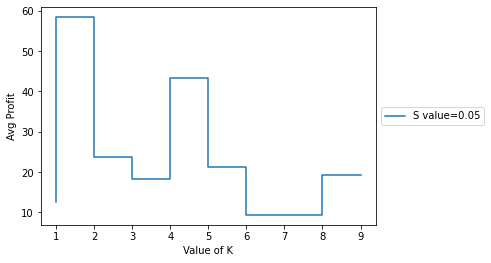

In [5]:
avgprofitprsh=[]
for t in new_k:
    prsh.svalue=0.05
    prsh.kvalue=t
    dumpfile=open('test1data.csv','w')
    #sess_id, starttime, endtime, trader_spec, order_schedule, tdump, dump_all, verbose
    market_session('test1', 0, 180, traders_spec, order_schedule, dumpfile, True, False)
    dumpfile.close()
    #plotGraph with  plot_trades('test1')
    names2=['Testid', 'Time', 'BestBid', 'BestOffer']

    for t in traderz:
        names2.append(str(traderz.index(t)) + 'type')
        names2.append(str(traderz.index(t))+ 'profit')
        names2.append(str(traderz.index(t)) + 'number')
        names2.append(str(traderz.index(t)) + 'avg')

    df = pd.read_csv('test1data.csv', names=names2 + ['Best Bid', 'Best offer', ' ' ])
    avgprofitprsh.append(df['1avg'].iloc[-1])

plt.ylabel('Avg Profit')
plt.xlabel('Value of K')
plt.step(new_k,avgprofitprsh,label='S value=' + str(prsh.svalue))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

print(new_k)
print(avgprofitprsh)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
[22.9, 23.9, 30.4, 41.8, 19.1, 19.4, 39.5, 49.0, 7.7]


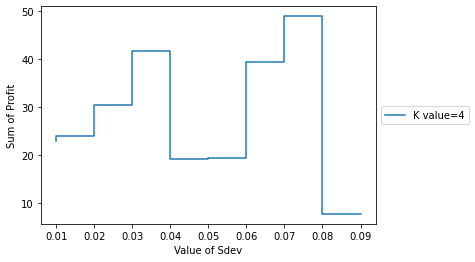

In [6]:
avgprofitprsh=[]
sumofprofit=[]
for i in new_mut_s:
    prsh.svalue=i
    prsh.kvalue=4
    dumpfile=open('test1data.csv','w')
    #sess_id, starttime, endtime, trader_spec, order_schedule, tdump, dump_all, verbose
    market_session('test1', 0, 180, traders_spec, order_schedule, dumpfile, True, False)
    dumpfile.close()
    #plotGraph with  plot_trades('test1')
    names2=['Testid', 'Time', 'BestBid', 'BestOffer']

    for t in traderz:
        names2.append(str(traderz.index(t)) + 'type')
        names2.append(str(traderz.index(t))+ 'profit')
        names2.append(str(traderz.index(t)) + 'number')
        names2.append(str(traderz.index(t)) + 'avg')

    df = pd.read_csv('test1data.csv', names=names2 + ['Best Bid', 'Best offer', ' ' ])
    avgprofitprsh.append(df['1avg'].iloc[-1])

sumofprofit.append(sum(avgprofitprsh))
plt.ylabel('Sum of Profit')
plt.xlabel('Value of Sdev')
plt.step(new_mut_s,avgprofitprsh, label='K value=' + str(prsh.kvalue))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  

print(new_mut_s)
print(avgprofitprsh)

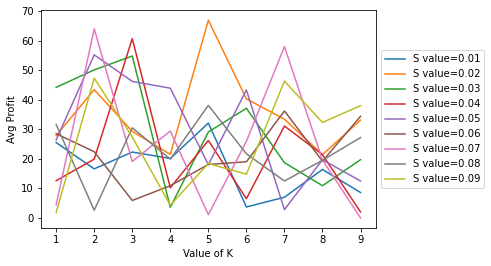

In [7]:
sumofprofit=[]
for i in new_mut_s:
    prsh.svalue=i
    avgprofitprsh=[]
    
    for t in new_k:
        prsh.kvalue=t
        dumpfile=open('test1data.csv','w')
        #sess_id, starttime, endtime, trader_spec, order_schedule, tdump, dump_all, verbose
        market_session('test1', 0, 180, traders_spec, order_schedule, dumpfile, True, False)
        dumpfile.close()
        #plotGraph with  plot_trades('test1')
        names2=['Testid', 'Time', 'BestBid', 'BestOffer']

        for t in traderz:
            names2.append(str(traderz.index(t)) + 'type')
            names2.append(str(traderz.index(t))+ 'profit')
            names2.append(str(traderz.index(t)) + 'number')
            names2.append(str(traderz.index(t)) + 'avg')

        df = pd.read_csv('test1data.csv', names=names2 + ['Best Bid', 'Best offer', ' ' ])
        avgprofitprsh.append(df['1avg'].iloc[-1])
    
    sumofprofit.append(sum(avgprofitprsh))
    plt.ylabel('Avg Profit')
    plt.xlabel('Value of K')
    #plt.plot(new_k,avgprofitprsh, label='S value=' + str(i))
    #plt.scatter(new_k,avgprofitprsh, label='S value=' + str(i))
    plt.plot(new_k,avgprofitprsh, label='S value=' + str(i))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    

    #fig = plt.figure()
    #ax = plt.subplot(111)
    #ax.plot(new_k,avgprofitprsh, label='S value=' + str(i))
    # Shrink current axis by 20%
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.show()



[152.29999999999998, 317.2, 268.2, 190.6, 268.0, 194.6, 221.5, 203.59999999999997, 230.59999999999997]
[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]


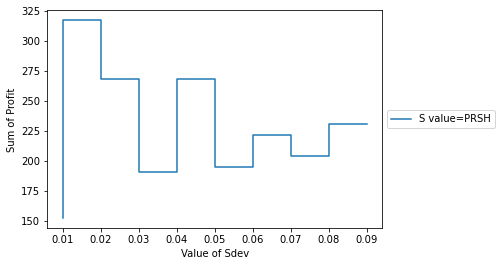

In [8]:
print(sumofprofit)
print(new_mut_s)
plt.ylabel('Sum of Profit')
plt.xlabel('Value of Sdev')
plt.step(new_mut_s,sumofprofit, label='S value=' + str(t))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


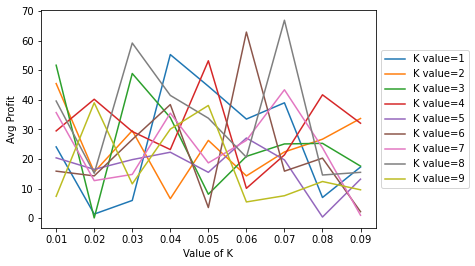

In [9]:
sumofprofit=[]
for i in new_k:
    prsh.kvalue=i
    avgprofitprsh=[]
    
    for t in new_mut_s:
        prsh.svalue=t
        dumpfile=open('test1data.csv','w')
        #sess_id, starttime, endtime, trader_spec, order_schedule, tdump, dump_all, verbose
        market_session('test1', 0, 180, traders_spec, order_schedule, dumpfile, True, False)
        dumpfile.close()
        #plotGraph with  plot_trades('test1')
        names2=['Testid', 'Time', 'BestBid', 'BestOffer']

        for t in traderz:
            names2.append(str(traderz.index(t)) + 'type')
            names2.append(str(traderz.index(t))+ 'profit')
            names2.append(str(traderz.index(t)) + 'number')
            names2.append(str(traderz.index(t)) + 'avg')

        df = pd.read_csv('test1data.csv', names=names2 + ['Best Bid', 'Best offer', ' ' ])
        avgprofitprsh.append(df['1avg'].iloc[-1])
    
    sumofprofit.append(sum(avgprofitprsh))       
    plt.ylabel('Avg Profit')
    plt.xlabel('Value of K')
    plt.plot(new_mut_s,avgprofitprsh, label='K value=' + str(i))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[228.20000000000002, 220.7, 231.7, 280.70000000000005, 154.89999999999998, 200.1, 211.90000000000003, 306.90000000000003, 161.29999999999998]


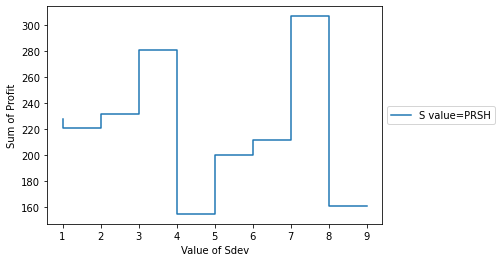

In [10]:
print(new_k)
print(sumofprofit)
plt.ylabel('Sum of Profit')
plt.xlabel('Value of Sdev')
plt.step(new_k,sumofprofit, label='S value=' + str(t))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
#First Extension
#defined value of s

def new_wait(s,k,x):
    #s for value of sdev, k for value of k, x is if either is kept constant or not. 0 for constant, 1 for variable
    if x==1:
        for i in range(50,3600):
            wait_value=(i*s)/k
            if wait_value>=2 & wait_value <=4:
                break;
            else:
                i=i+50
    elif x==0:
        for i in range(50,3600):
            wait_value=i*s/k
            if wait_value>=18 & wait_value <=23:
                break;
            else:
                i=i+50
    else:
        print('Error, incorrect value of x!')
        
    
    
return wait_value

#s is constant, k is variable
s=0.05 
for i in new_k:
    prsh.kvalue=i
    prsh.waitvalue=new_wait(s,i,0)
    ...

#k is constant s is variable
k=8 
for i in new_mut_s:
    prsh.svalue=i
    prsh.waitvalue=new_wait(i,k,0)
    ...

# k and s both are variable
for i in new_k:
    for t in new_mut_s:
        prsh.kvalue=i
        prsh.svalue=t
        prsh.waitvalue=new_wait(t,i,1)

In [12]:
#Second Extension
# Extract traders 
buyers_spec = [('GVWY',5),('SHVR',5),('ZIC',5),('ZIP',5),('PRSH',5)]

traderz=[]
for i in buyers_spec:
    traderz.append(i[0])

gvwycount= traderz.count('GVWY')
ziccount= traderz.count('ZIC')
shvrcount= traderz.count('SHVR')

print( str(gvwycount) + ':' + str(ziccount) + ':' + str(shvrcount) )

if(gvwycount!=0 & ziccount!=0 & shvrcount!=0):
    ratio1=max(gvwycount,ziccount)/min(gvwycount/ziccount) * max(ziccount,shvrcount)/min(ziccount/shvrcount) * max(gvwycount,shvrcount)/min(gvwycount/shvrcount)
    prsh.rangemin=random.uniform(-0.50,0.50)/ratiol
    prsh.rangemax=random.uniform(-0.50,0.50)/ratiol
elif(gvwycount==0 & ziccount!=0 & shvrcount!=0):
    ratio1=max(shvrcount,ziccount)/min(shvrcount/ziccount) 
    prsh.rangemin=random.uniform(0,0.85)/ratiol
    prsh.rangemax=random.uniform(0,0.85)/ratiol
elif(gvwycount!=0 & ziccount==0 & shvrcount!=0):
    ratio1=max(gvwycount,shvrcount)/min(gvwycount/shvrcount)
    prsh.rangemin=random.uniform(-0.85,0.85)/ratiol
    prsh.rangemax=random.uniform(-0.85,0.85)/ratiol
elif(gvwycount!=0 & ziccount!=0 & shvrcount==0):
    ratio1=max(gvwycount,ziccount)/min(gvwycount/ziccount)
    prsh.rangemin=random.uniform(-0.85,0)/ratiol
    prsh.rangemax=random.uniform(-0.85,0)/ratiol

print(ratiol)



1:1:1


In [19]:
#Third Extension
    # how to mutate the strategy values when hill-climbing
buyers_spec = [('GVWY',5),('SHVR',5),('ZIC',5),('ZIP',5),('PRSH',5)]

traderz=[]
for i in buyers_spec:
    traderz.append(i[0])

gvwycount= traderz.count('GVWY')
ziccount= traderz.count('ZIC')
shvrcount= traderz.count('SHVR')

print( str(gvwycount) + ':' + str(ziccount) + ':' + str(shvrcount) )

if(gvwycount!=0 & ziccount!=0 & shvrcount!=0):
    ratio1=max(gvwycount,ziccount)/min(gvwycount/ziccount) * max(ziccount,shvrcount)/min(ziccount/shvrcount) * max(gvwycount,shvrcount)/min(gvwycount/shvrcount)
    prsh.minval=random.uniform(-0.50,0.50)*ratiol
    prsh.maxval=random.uniform(-0.50,0.50)*ratiol
elif(gvwycount==0 & ziccount!=0 & shvrcount!=0):
    ratio1=max(shvrcount,ziccount)/min(shvrcount/ziccount) 
    prsh.minval=random.uniform(0,0.85)*ratiol
    prsh.maxval=random.uniform(0,0.85)*ratiol
elif(gvwycount!=0 & ziccount==0 & shvrcount!=0):
    ratio1=max(gvwycount,shvrcount)/min(gvwycount/shvrcount)
    prsh.minval=random.uniform(-0.85,0.85)*ratiol
    prsh.maxval=random.uniform(-0.85,0.85)*ratiol
elif(gvwycount!=0 & ziccount!=0 & shvrcount==0):
    ratio1=max(gvwycount,ziccount)/min(gvwycount/ziccount)
    prsh.minval=random.uniform(-0.85,0)*ratiol
    prsh.maxval=random.uniform(-0.85,0)*ratiol    

    def mutate_strat(self, s):
        sdev = self.svalue
        newstrat = s
           
        while newstrat == s:
        newstrat = s + random.gauss(0.0, sdev)
        newstrat = max(minvalue, maxvalue))
        print('newstart=' + newstrat)
        return newstrat



-0.4192228148997761
